# Load sequence generator ( lsg )

Load sequence generator can generate the pseudo load sequence for fatigue and fracture test.

In [1]:
# Import auxiliary libraries for demonstration

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams[ "figure.figsize" ] = [ 5, 4 ]

plt.rcParams[ "figure.dpi" ] = 80
plt.rcParams[ "font.family" ] = "Times New Roman"
plt.rcParams[ "font.size" ] = '14'

## Random walk

Random walk is a random process describing a succession of random steps in the mathematical space.

### Uniform random walk

Function `randomWalkUniform` implements the uniform random walk function.

The uniform random walk starts from the mathematical origin. The function then updates the coordinates by randomly picking a dimension and a direction.

#### Function help

In [2]:
from ffpack.lsg import randomWalkUniform
help( randomWalkUniform )

Help on function randomWalkUniform in module ffpack.lsg.randomWalk:

randomWalkUniform(numSteps, dim=1)
    Generate load sequence by a random walk.
    
    Parameters
    ----------
    numSteps: integer 
        Number of steps for generating.
    dim: scalar, optional
        Data dimension.
    
    Returns
    -------
    rst: 2d array
        A 2d (numSteps by dim) matrix holding the coordinates 
        of the position at each step.
    
    Raises
    ------
    ValueError
        If the numSteps is less than 1 or the dim is less than 1.
    
    Examples
    --------
    >>> from ffpack.lsg import randomWalkUniform
    >>> rst = randomWalkUniform( 5 )



#### Example in 1D space

In [3]:
# Set random seed for repeatable results
from ffpack.config import globalConfig
globalConfig.setSeed( 0 )

urw1dResults = randomWalkUniform( 500, 1 )

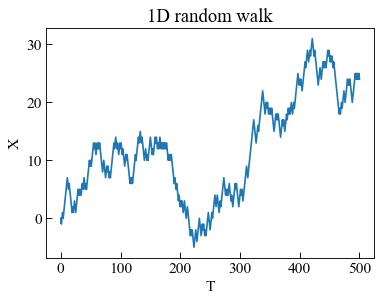

In [4]:
fig, ax = plt.subplots()

ax.plot( np.array( urw1dResults ) )

ax.tick_params(axis='x', direction="in", length=5)
ax.tick_params(axis='y', direction="in", length=5)
ax.set_ylabel( "X" )
ax.set_xlabel( "T" )
ax.set_title( "1D random walk" )

plt.tight_layout()
plt.show()

#### Example in 2D space

In [5]:
# Set random seed for repeatable results
from ffpack.config import globalConfig
globalConfig.setSeed( 0 )

urw2dResults = randomWalkUniform( 500, 2 )

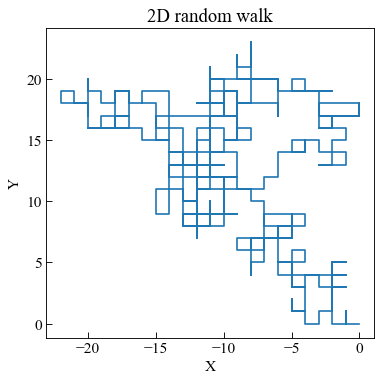

In [6]:
fig, ax = plt.subplots( figsize=( 5, 5 ) )

ax.plot( np.array( urw2dResults )[ :, 0 ], 
         np.array( urw2dResults )[ :, 1 ] )

ax.tick_params(axis='x', direction="in", length=5)
ax.tick_params(axis='y', direction="in", length=5)
ax.set_ylabel( "Y" )
ax.set_xlabel( "X" )
ax.set_title( "2D random walk" )

plt.tight_layout()
plt.show()

## Autoregressive moving average model

### Normal autoregressive (AR) model

Autoregressive model is a random process describing the time-varying procedure in which the output depends on the previous values. The p-th order autoregressive model can be expressed by the following equation,

$$
X_t = \sum_{i=1}^{p} \phi_i X_{t-i} + \epsilon_t
$$

where $X_t$ is the observed values; $\phi_i$ is the coefficient; $\epsilon_t$ is the white noise. For normal autoregressive mode, $\epsilon_t$ follows the normal distribution. 

Therefore, in order to generate the data of the autoregressive model, the initial observed values and corresponding coefficients should be provided. The distribution for $\epsilon_t$ can be different based on the model choice.

Function `arNormal` implements the autoregressive model with normal distributed white noise for arbitrary order. The order depends on the length of the initial observed values.

#### Function help

In [7]:
from ffpack.lsg import arNormal
help( arNormal )

Help on function arNormal in module ffpack.lsg.autoregressiveModel:

arNormal(numSteps, obs, phis, mu, sigma)
    Generate load sequence by an autoregressive model.
    
    The white noise is generated by the normal distribution.
    
    Parameters
    ----------
    numSteps: integer 
        Number of steps for generating.
    obs: 1d array
        Initial observed values.
    phis: 1d array
        Coefficients for the autoregressive model.
    mu: scalar
        Mean of the white noise.
    sigma: scalar
        Standard deviation of the white noise.
    
    Returns
    -------
    rst: 1d array
        Generated sequence includes the observed values.
    
    Raises
    ------
    ValueError
        If the numSteps is less than 1.
        If lengths of obs and phis are not equal.
    
    Examples
    --------
    >>> from ffpack.lsg import arNormal
    >>> obs = [ 0, 1 ]
    >>> phis = [ 0.5, 0.3 ]
    >>> rst = arNormal( 500, obs, phis, 0, 0.5 )



#### Example with first order AR model

In [8]:
# Set random seed for repeatable results
from ffpack.config import globalConfig
globalConfig.setSeed( 123 )

obs = [ 0 ]
phis = [ 0.5 ]
arn1stResults = arNormal( 500, obs, phis, 0, 0.5 )

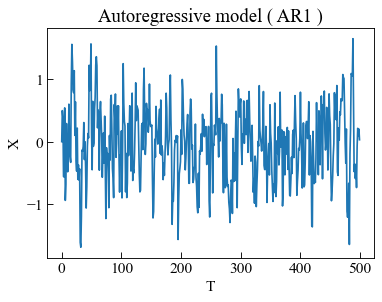

In [9]:
fig, ax = plt.subplots()

ax.plot( np.array( arn1stResults ) )

ax.tick_params(axis='x', direction="in", length=5)
ax.tick_params(axis='y', direction="in", length=5)
ax.set_ylabel( "X" )
ax.set_xlabel( "T" )
ax.set_title( "Autoregressive model ( AR1 )" )

plt.tight_layout()
plt.show()

#### Example with second order AR model

In [10]:
# Set random seed for repeatable results
from ffpack.config import globalConfig
globalConfig.setSeed( 321 )

obs = [ 0, 0 ]
phis = [ 0.5, 0.3 ]
arn2ndResults = arNormal( 500, obs, phis, 0, 0.5 )

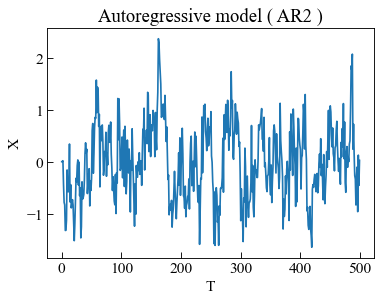

In [11]:
fig, ax = plt.subplots()

ax.plot( np.array( arn2ndResults ) )

ax.tick_params(axis='x', direction="in", length=5)
ax.tick_params(axis='y', direction="in", length=5)
ax.set_ylabel( "X" )
ax.set_xlabel( "T" )
ax.set_title( "Autoregressive model ( AR2 )" )

plt.tight_layout()
plt.show()

### Normal moving average (MA) model

Moving average model is a common method to model the univariate time series. It can be represented by the following equation,

$$
X_t = c + \sum_{i=1}^{q} \theta_i \epsilon_{t-i} + \epsilon_t
$$

where $X_t$ is the observed values; $\theta_i$ is the coefficient; $\epsilon_t$ are the white noise error term. For normal autoregressive mode, $\epsilon_t$ follows the normal distribution. 


Function `maNormal` implements the moving average model with normal distributed white noise for arbitrary order. The order depends on the length of the coefficients for the white noise.

#### Function help

In [12]:
from ffpack.lsg import maNormal
help( maNormal )

Help on function maNormal in module ffpack.lsg.autoregressiveModel:

maNormal(numSteps, c, thetas, mu, sigma)
    Generate load sequence by a moving-average model.
    
    The white noise is generated by the normal distribution.
    
    Parameters
    ----------
    numSteps: integer 
        Number of steps for generating.
    c: scalar
        Mean of the series.
    thetas: 1d array
        Coefficients for the white noise in the moving-average model.
    mu: scalar
        Mean of the white noise.
    sigma: scalar
        Standard deviation of the white noise.
    
    Returns
    -------
    rst: 1d array
        Generated sequence with moving-average model.
    
    Raises
    ------
    ValueError
        If the numSteps is less than 1.
        If mean of the series is not a scalar.
        If the thetas is empty.
    
    Examples
    --------
    >>> from ffpack.lsg import maNormal
    >>> thetas = [ 0.8, 0.5 ]
    >>> rst = maNormal( 500, 0, thetas, 0, 0.5 )



#### Example with first order MA model

In [13]:
# Set random seed for repeatable results
from ffpack.config import globalConfig
globalConfig.setSeed( 123 )

c = 0
thetas = [ 5 ]
man1stResults = maNormal( 500, c, thetas, 0, 0.5 )

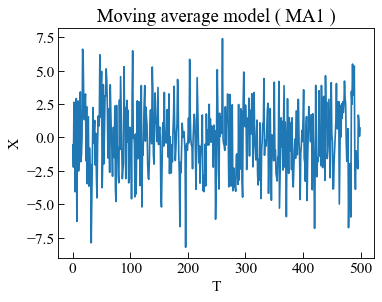

In [14]:
fig, ax = plt.subplots()

ax.plot( np.array( man1stResults ) )

ax.tick_params(axis='x', direction="in", length=5)
ax.tick_params(axis='y', direction="in", length=5)
ax.set_ylabel( "X" )
ax.set_xlabel( "T" )
ax.set_title( "Moving average model ( MA1 )" )

plt.tight_layout()
plt.show()

#### Example with second order MA model

In [15]:
# Set random seed for repeatable results
from ffpack.config import globalConfig
globalConfig.setSeed( 321 )

c = 0
thetas = [ 2, 4 ]
man2ndResults = maNormal( 500, c, thetas, 0, 0.5 )

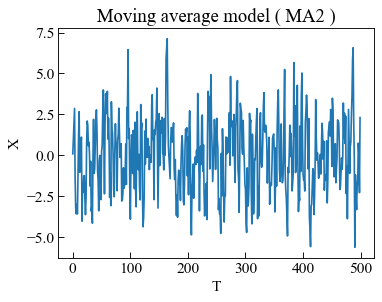

In [16]:
fig, ax = plt.subplots()

ax.plot( np.array( man2ndResults ) )

ax.tick_params(axis='x', direction="in", length=5)
ax.tick_params(axis='y', direction="in", length=5)
ax.set_ylabel( "X" )
ax.set_xlabel( "T" )
ax.set_title( "Moving average model ( MA2 )" )

plt.tight_layout()
plt.show()

### Normal ARMA model

Autoregressive moving average model is a combination of AR model and MA model. It can be represented by the following equation,

$$
X_t = \sum_{i=1}^{p} \phi_i X_{t-i} + \sum_{i=1}^{q} \theta_i \epsilon_{t-i} + \epsilon_t
$$

where $X_t$ is the observed values; $\phi_i$ is the coefficient; $\theta_i$ is the coefficient; $\epsilon_t$ are the white noise error term. For normal autoregressive moving average mode, $\epsilon_t$ follows the normal distribution. 

Function `armaNormal` implements the autoregressive moving average model with normal distributed white noise for arbitrary order. The AR order $p$ and MA order $q$ depend on the length of the initial observed values and coefficients for the white noise. It should be noted that the order for AR model and MA model can be different.

#### Function help

In [17]:
from ffpack.lsg import armaNormal
help( armaNormal )

Help on function armaNormal in module ffpack.lsg.autoregressiveModel:

armaNormal(numSteps, obs, phis, thetas, mu, sigma)
    Generate load sequence by an autoregressive-moving-average model.
    
    The white noise is generated by the normal distribution.
    
    Parameters
    ----------
    numSteps: integer 
        Number of steps for generating.
    obs: 1d array
        Initial observed values, could be empty.
    phis: 1d array
        Coefficients for the autoregressive part.
    thetas: 1d array
        Coefficients for the white noise for the moving-average part.
    mu: scalar
        Mean of the white noise.
    sigma: scalar
        Standard deviation of the white noise.
    
    Returns
    -------
    rst: 1d array
        Generated sequence includes the observed values.
    
    Raises
    ------
    ValueError
        If the numSteps is less than 1.
        If the phis is empty.
        If the thetas is empty.
    
    Examples
    --------
    >>> from ffpack.lsg i

#### Example with first order ARMA model

In [18]:
# Set random seed for repeatable results
from ffpack.config import globalConfig
globalConfig.setSeed( 123 )

obs = [ 0 ]
phis = [ 0.5 ]
thetas = [ 0.8 ]
arman1stResults = armaNormal( 500, obs, phis, thetas, 0, 0.5 )

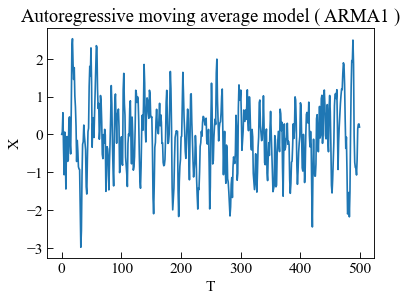

In [19]:
fig, ax = plt.subplots()

ax.plot( np.array( arman1stResults ) )

ax.tick_params(axis='x', direction="in", length=5)
ax.tick_params(axis='y', direction="in", length=5)
ax.set_ylabel( "X" )
ax.set_xlabel( "T" )
ax.set_title( "Autoregressive moving average model ( ARMA1 )" )

plt.tight_layout()
plt.show()

#### Example with second order ARMA model

In [20]:
# Set random seed for repeatable results
from ffpack.config import globalConfig
globalConfig.setSeed( 321 )

obs = [ 0, 1 ]
phis = [ 0.5, 0.3 ]
thetas = [ 0.8, 0.5 ]
arman2ndResults = armaNormal( 500, obs, phis, thetas, 0, 0.5 )

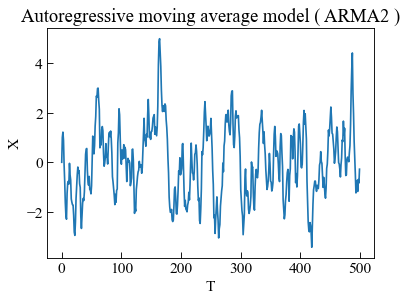

In [21]:
fig, ax = plt.subplots()

ax.plot( np.array( arman2ndResults ) )

ax.tick_params(axis='x', direction="in", length=5)
ax.tick_params(axis='y', direction="in", length=5)
ax.set_ylabel( "X" )
ax.set_xlabel( "T" )
ax.set_title( "Autoregressive moving average model ( ARMA2 )" )

plt.tight_layout()
plt.show()

### Normal ARIMA model

AutoRegressive integrated moving average is the combination of **differenced** AR model and MA model. It can be represented by the following equation,

$$
X'_t = c + \sum_{i=1}^{p} \phi_i X'_{t-i} + \sum_{i=1}^{q} \theta_i \epsilon_{t-i} + \epsilon_t
$$

where $X'_t$ is the **differenced** observed values; $\phi_i$ is the coefficient; $\theta_i$ is the coefficient; $\epsilon_t$ are the white noise error term. For normal autoregressive integrated moving average mode, $\epsilon_t$ follows the normal distribution. 


Function `arimaNormal` implements the **first** order differenced ARIMA model with normal distributed white noise. The AR order $p$ and MA order $q$ depend on the length of coefficients. It should be noted that the order for AR model and MA model can be different.

#### Function help

In [22]:
from ffpack.lsg import arimaNormal
help( arimaNormal )

Help on function arimaNormal in module ffpack.lsg.autoregressiveModel:

arimaNormal(numSteps, c, phis, thetas, mu, sigma)
    Generate load sequence by an autoregressive integrated moving average model.
    
    The white noise is generated by the normal distribution.
    
    First-order diference is used in this function.
    
    Parameters
    ----------
    numSteps: integer 
        Number of steps for generating.
    c: scalar
        Mean of the series.
    phis: 1d array
        Coefficients for the autoregressive part.
    thetas: 1d array
        Coefficients for the white noise for the moving-average part.
    mu: scalar
        Mean of the white noise.
    sigma: scalar
        Standard deviation of the white noise.
    
    Returns
    -------
    rst: 1d array
        Generated sequence with the autoregressive integrated moving average model.
    
    Raises
    ------
    ValueError
        If the numSteps is less than 1.
        If mean of the series is not a scalar.
 

#### Example with first order ARIMA model

In [23]:
# Set random seed for repeatable results
from ffpack.config import globalConfig
globalConfig.setSeed( 123 )

c = 0.0
phis = [ 0.1 ]
thetas = [ 2 ]
ariman1stDiffResults = arimaNormal( 500, c, phis, thetas, 0, 0.5 )
ariman1stCumResults = np.cumsum( ariman1stDiffResults )

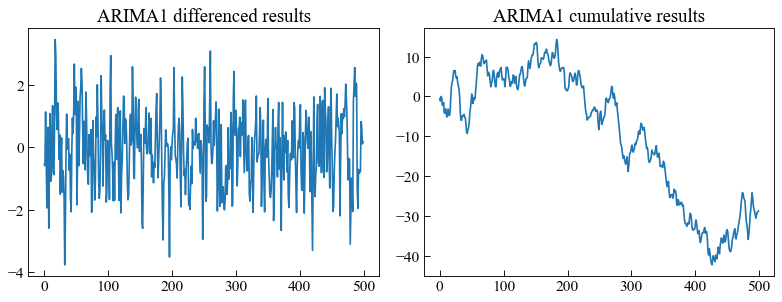

In [24]:
fig, ( ax1, ax2 ) = plt.subplots( 1, 2, figsize=( 10, 4 ) )

ax1.plot( np.array( ariman1stDiffResults ) )

ax1.tick_params( axis='x', direction="in", length=5 )
ax1.tick_params( axis='y', direction="in", length=5 )
ax.set_ylabel( "X'" )
ax.set_xlabel( "T" )
ax1.set_title( "ARIMA1 differenced results" )

ax2.plot( np.array( ariman1stCumResults ) )

ax2.tick_params( axis='x', direction="in", length=5 )
ax2.tick_params( axis='y', direction="in", length=5 )
ax.set_ylabel( "X" )
ax.set_xlabel( "T" )
ax2.set_title( "ARIMA1 cumulative results" )

plt.tight_layout()
plt.show()

#### Example with second order ARIMA model

In [25]:
# Set random seed for repeatable results
from ffpack.config import globalConfig
globalConfig.setSeed( 321 )

c = 0.0
phis = [ 0.1, 0.5 ]
thetas = [ 2, 5 ]
ariman2ndDiffResults = arimaNormal( 500, c, phis, thetas, 0, 0.5 )
ariman2ndCumResults = np.cumsum( ariman2ndDiffResults )

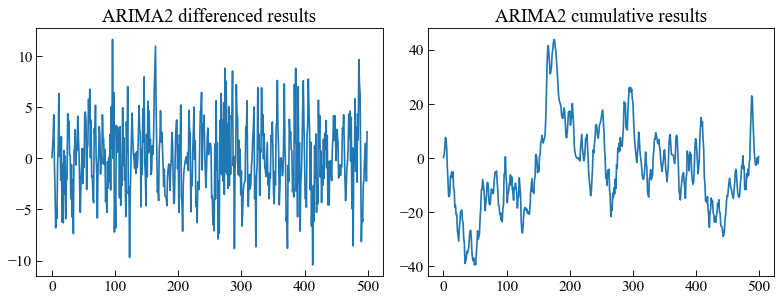

In [26]:
fig, ( ax1, ax2 ) = plt.subplots( 1, 2, figsize=( 10, 4 ) )

ax1.plot( np.array( ariman2ndDiffResults ) )

ax1.tick_params( axis='x', direction="in", length=5 )
ax1.tick_params( axis='y', direction="in", length=5 )
ax.set_ylabel( "X'" )
ax.set_xlabel( "T" )
ax1.set_title( "ARIMA2 differenced results" )

ax2.plot( np.array( ariman2ndCumResults ) )

ax2.tick_params( axis='x', direction="in", length=5 )
ax2.tick_params( axis='y', direction="in", length=5 )
ax.set_ylabel( "X" )
ax.set_xlabel( "T" )
ax2.set_title( "ARIMA2 cumulative results" )

plt.tight_layout()
plt.show()